In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [2]:
vaccinedata = pd.read_excel(r"/Users/milliegallacher/Desktop/University/Year 2/Data Skills/Report/vaccinedata.xlsx")

In [3]:
vaccinedata.head()

,NHS CCGs Represented,Region,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated,Unnamed: 6,Location,Deaths From Flu,Population Size For Location/NHS Commissioning Group
0,NHS DERBY AND DERBYSHIRE CCG,NHS ENGLAND (EAST MIDLANDS),214579,162889,135727,62509,NaN,Derby & Derbyshire,545,780000
1,Combination of CCGs (Leicester City & East Lei...,NHS ENGLAND (EAST MIDLANDS),200781,146237,141546,56233,NaN,"Leicestershire, Leicester & Rutland (Leicester...",390,1107597
2,Combination of CCGs (East - West - South - Sou...,NHS ENGLAND (EAST MIDLANDS),184821,134570,98541,45378,NaN,Lincolnshire (East - West - South - South West),358,766333
3,Combination of following CCGs (Nottingham City...,NHS ENGLAND (EAST MIDLANDS),68468,49400,62202,25934,NaN,Nottingham (Nottingham City - Bassetlaw),129,337098
4,"Combination of CCGs (Nottingham West, North, E...",NHS ENGLAND (EAST MIDLANDS),147023,113123,88247,42300,NaN,"Nottinghamshire (Nottingham West, North, East ...",394,833377


In [4]:
vaccinedata.isnull().sum()
#Nulls due to an empty column

NHS CCGs Represented                                     0
Region                                                   0
Patients 65 and over Registered                          0
Patients 65 and over Registered Vaccinated               0
Vulnerable patients under 65 Registered                  0
Vulnerable patients under 65 Vaccinated                  0
Unnamed: 6                                              94
Location                                                 0
Deaths From Flu                                          0
Population Size For Location/NHS Commissioning Group     0
dtype: int64

In [5]:
vaccinedata.set_index("NHS CCGs Represented", inplace = True)

In [6]:
vaccinedata["% over 65 Vaccinated"] = vaccinedata["Patients 65 and over Registered Vaccinated"]/vaccinedata["Patients 65 and over Registered"]*100
vaccinedata["% vulnerable under 65 Vaccinated"] = vaccinedata["Vulnerable patients under 65 Vaccinated"]/vaccinedata["Vulnerable patients under 65 Registered"]*100
vaccinedata["Death rate (Deaths/Registered)"] = vaccinedata["Deaths From Flu"]/(vaccinedata["Patients 65 and over Registered"] + vaccinedata["Vulnerable patients under 65 Registered"])

In [7]:
vaccinedata.drop(vaccinedata.columns[[5]], axis = 1, inplace = True)
#Empty column removed

In [8]:
vaccinedata.head()

,Region,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated,Location,Deaths From Flu,Population Size For Location/NHS Commissioning Group,% over 65 Vaccinated,% vulnerable under 65 Vaccinated,Death rate (Deaths/Registered)
NHS CCGs Represented,,,,,,,,,,,
NHS DERBY AND DERBYSHIRE CCG,NHS ENGLAND (EAST MIDLANDS),214579,162889,135727,62509,Derby & Derbyshire,545,780000,75.910970,46.054949,0.001556
Combination of CCGs (Leicester City & East Leicestershire & Rutland),NHS ENGLAND (EAST MIDLANDS),200781,146237,141546,56233,"Leicestershire, Leicester & Rutland (Leicester...",390,1107597,72.834083,39.727721,0.001139
Combination of CCGs (East - West - South - South West),NHS ENGLAND (EAST MIDLANDS),184821,134570,98541,45378,Lincolnshire (East - West - South - South West),358,766333,72.810990,46.049868,0.001263
Combination of following CCGs (Nottingham City - Bassetlaw),NHS ENGLAND (EAST MIDLANDS),68468,49400,62202,25934,Nottingham (Nottingham City - Bassetlaw),129,337098,72.150494,41.693193,0.000987
"Combination of CCGs (Nottingham West, North, East + Mansfield & Ashfield + Newark & Sherwood + Rushcliffe)",NHS ENGLAND (EAST MIDLANDS),147023,113123,88247,42300,"Nottinghamshire (Nottingham West, North, East ...",394,833377,76.942383,47.933641,0.001675


In [9]:
#Regions split into separate dataframes if needed
east_midlands_df = vaccinedata[vaccinedata["Region"] == "NHS ENGLAND (EAST MIDLANDS)"]
east_df = vaccinedata[vaccinedata["Region"] == "NHS ENGLAND (EAST)"]
london_df = vaccinedata[vaccinedata["Region"] == "NHS ENGLAND (LONDON)"]
north_east_df = vaccinedata[vaccinedata["Region"] == "NHS ENGLAND (NORTH EAST)"]
north_west_df = vaccinedata[vaccinedata["Region"] == "NHS ENGLAND (NORTH WEST)"]
south_east_df = vaccinedata[vaccinedata["Region"] == "NHS ENGLAND (SOUTH EAST)"]
south_west_df = vaccinedata[vaccinedata["Region"] == "NHS ENGLAND (SOUTH WEST)"]
west_midlands_df = vaccinedata[vaccinedata["Region"] == "NHS ENGLAND (WEST MIDLANDS)"]
yorkshire_df = vaccinedata[vaccinedata["Region"] == "NHS ENGLAND (YORKSHIRE AND HUMBER)"]

In [10]:
print(east_midlands_df.mean(numeric_only = True))
print(east_df.mean(numeric_only = True))
print(london_df.mean(numeric_only = True))
print(north_east_df.mean(numeric_only = True))
print(north_west_df.mean(numeric_only = True))
print(south_east_df.mean(numeric_only = True))
print(south_west_df.mean(numeric_only = True))
print(west_midlands_df.mean(numeric_only = True))
print(yorkshire_df.mean(numeric_only = True))

Patients 65 and over Registered               118724.666667
Patients 65 and over Registered Vaccinated     87504.333333
Vulnerable patients under 65 Registered        74622.222222
Vulnerable patients under 65 Vaccinated        33167.222222
Deaths From Flu                                  289.888889
% over 65 Vaccinated                              72.988912
% vulnerable under 65 Vaccinated                  44.990705
Death rate (Deaths/Registered)                     0.001542
dtype: float64
Patients 65 and over Registered               152092.888889
Patients 65 and over Registered Vaccinated    109269.666667
Vulnerable patients under 65 Registered        95245.666667
Vulnerable patients under 65 Vaccinated        40608.555556
Deaths From Flu                                  277.111111
% over 65 Vaccinated                              70.282571
% vulnerable under 65 Vaccinated                  41.804453
Death rate (Deaths/Registered)                     0.001193
dtype: float64
Patients 6

In [11]:
vaccinedata["Death rate (Deaths/Registered)"] = 100 *vaccinedata["Deaths From Flu"]/(vaccinedata["Patients 65 and over Registered"] + vaccinedata["Vulnerable patients under 65 Registered"])

In [12]:
vaccinedata["Death rate (Deaths/Registered)"]  = vaccinedata["Death rate (Deaths/Registered)"] .mul(100)

In [13]:
east_midlands_df.head()

,Region,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated,Location,Deaths From Flu,Population Size For Location/NHS Commissioning Group,% over 65 Vaccinated,% vulnerable under 65 Vaccinated,Death rate (Deaths/Registered)
NHS CCGs Represented,,,,,,,,,,,
NHS DERBY AND DERBYSHIRE CCG,NHS ENGLAND (EAST MIDLANDS),214579,162889,135727,62509,Derby & Derbyshire,545,780000,75.910970,46.054949,0.001556
Combination of CCGs (Leicester City & East Leicestershire & Rutland),NHS ENGLAND (EAST MIDLANDS),200781,146237,141546,56233,"Leicestershire, Leicester & Rutland (Leicester...",390,1107597,72.834083,39.727721,0.001139
Combination of CCGs (East - West - South - South West),NHS ENGLAND (EAST MIDLANDS),184821,134570,98541,45378,Lincolnshire (East - West - South - South West),358,766333,72.810990,46.049868,0.001263
Combination of following CCGs (Nottingham City - Bassetlaw),NHS ENGLAND (EAST MIDLANDS),68468,49400,62202,25934,Nottingham (Nottingham City - Bassetlaw),129,337098,72.150494,41.693193,0.000987
"Combination of CCGs (Nottingham West, North, East + Mansfield & Ashfield + Newark & Sherwood + Rushcliffe)",NHS ENGLAND (EAST MIDLANDS),147023,113123,88247,42300,"Nottinghamshire (Nottingham West, North, East ...",394,833377,76.942383,47.933641,0.001675


In [14]:
#Mean for each particular variable for east midlands (test)
mean_overs_em = east_midlands_df["% over 65 Vaccinated"].mean()
mean_unders_em = east_midlands_df["% vulnerable under 65 Vaccinated"].mean()
mean_rate_em = east_midlands_df["Death rate (Deaths/Registered)"].mean()

In [18]:
#Row tester
row_east

{'Region': 'East',
 'mean % over 65 registered': 152092.88888888888,
 'mean % over 65 vaccinated': 70.2825714755446,
 'mean % vulnerable under 65 registered': 95245.66666666667,
 'mean % vulnerable under 65 vaccinated': 41.80445317807284,
 'mean deaths from Flu': 277.1111111111111,
 'mean death rate (deaths/registered)': 0.0011929317952093694}

In [95]:
#To make my dataframe I need to create a dictionary for each row 
row_east = {"Region" : "East",  "mean over 65 registered" : east_df["Patients 65 and over Registered"].mean(), "mean % over 65 vaccinated" :east_df["% over 65 Vaccinated"].mean(), "mean vulnerable under 65 registered" : east_df["Vulnerable patients under 65 Registered"].mean(), "mean % vulnerable under 65 vaccinated" : east_df["% vulnerable under 65 Vaccinated"].mean(), "mean deaths from Flu" : east_df["Deaths From Flu"].mean(), "mean death rate (deaths/registered)" : east_df["Death rate (Deaths/Registered)"].mean()}
row_westmidlands  =  {"Region" : "West Midlands",  "mean over 65 registered" : west_midlands_df["Patients 65 and over Registered"].mean(), "mean % over 65 vaccinated" :west_midlands_df["% over 65 Vaccinated"].mean(), "mean vulnerable under 65 registered" : west_midlands_df["Vulnerable patients under 65 Registered"].mean(), "mean % vulnerable under 65 vaccinated" : west_midlands_df["% vulnerable under 65 Vaccinated"].mean(), "mean deaths from Flu" : west_midlands_df["Deaths From Flu"].mean(), "mean death rate (deaths/registered)" : west_midlands_df["Death rate (Deaths/Registered)"].mean()}
row_eastmidlands =  {"Region" : "East Midlands",  "mean over 65 registered" : east_midlands_df["Patients 65 and over Registered"].mean(), "mean % over 65 vaccinated" : east_midlands_df["% over 65 Vaccinated"].mean(), "mean vulnerable under 65 registered" : east_midlands_df["Vulnerable patients under 65 Registered"].mean(), "mean % vulnerable under 65 vaccinated" : east_midlands_df["% vulnerable under 65 Vaccinated"].mean(), "mean deaths from Flu" : east_midlands_df["Deaths From Flu"].mean(), "mean death rate (deaths/registered)" : east_midlands_df["Death rate (Deaths/Registered)"].mean()}
row_london =  {"Region" : "London",  "mean over 65 registered" : london_df["Patients 65 and over Registered"].mean(), "mean % over 65 vaccinated" : london_df["% over 65 Vaccinated"].mean(), "mean vulnerable under 65 registered" : london_df["Vulnerable patients under 65 Registered"].mean(), "mean % vulnerable under 65 vaccinated" : london_df["% vulnerable under 65 Vaccinated"].mean(), "mean deaths from Flu" : london_df["Deaths From Flu"].mean(), "mean death rate (deaths/registered)" : london_df["Death rate (Deaths/Registered)"].mean()}
row_northeast =  {"Region" : "North East",  "mean over 65 registered" : north_east_df["Patients 65 and over Registered"].mean(), "mean % over 65 vaccinated" : north_east_df["% over 65 Vaccinated"].mean(), "mean vulnerable under 65 registered" : north_east_df["Vulnerable patients under 65 Registered"].mean(), "mean % vulnerable under 65 vaccinated" : north_east_df["% vulnerable under 65 Vaccinated"].mean(), "mean deaths from Flu" : north_east_df["Deaths From Flu"].mean(), "mean death rate (deaths/registered)" : north_east_df["Death rate (Deaths/Registered)"].mean()}
row_northwest =  {"Region" : "North Westt",  "mean over 65 registered" : north_west_df["Patients 65 and over Registered"].mean(), "mean % over 65 vaccinated" : north_west_df["% over 65 Vaccinated"].mean(), "mean vulnerable under 65 registered" : north_west_df["Vulnerable patients under 65 Registered"].mean(), "mean % vulnerable under 65 vaccinated" : north_west_df["% vulnerable under 65 Vaccinated"].mean(), "mean deaths from Flu" : north_west_df["Deaths From Flu"].mean(), "mean death rate (deaths/registered)" : north_west_df["Death rate (Deaths/Registered)"].mean()}
row_southeast =   {"Region" : "South East",  "mean over 65 registered" : south_east_df["Patients 65 and over Registered"].mean(), "mean % over 65 vaccinated" : south_east_df["% over 65 Vaccinated"].mean(), "mean vulnerable under 65 registered" : south_east_df["Vulnerable patients under 65 Registered"].mean(), "mean % vulnerable under 65 vaccinated" : south_east_df["% vulnerable under 65 Vaccinated"].mean(), "mean deaths from Flu" : south_east_df["Deaths From Flu"].mean(), "mean death rate (deaths/registered)" : south_east_df["Death rate (Deaths/Registered)"].mean()}
row_southwest =   {"Region" : "South West",  "mean over 65 registered" : south_west_df["Patients 65 and over Registered"].mean(), "mean % over 65 vaccinated" : south_west_df["% over 65 Vaccinated"].mean(), "mean vulnerable under 65 registered" : south_west_df["Vulnerable patients under 65 Registered"].mean(), "mean % vulnerable under 65 vaccinated" : south_west_df["% vulnerable under 65 Vaccinated"].mean(), "mean deaths from Flu" : south_west_df["Deaths From Flu"].mean(), "mean death rate (deaths/registered)" : south_west_df["Death rate (Deaths/Registered)"].mean()}
row_yorkshire =   {"Region" : "Yorkshire and Humber",  "mean over 65 registered" : yorkshire_df["Patients 65 and over Registered"].mean(), "mean % over 65 vaccinated" :yorkshire_df["% over 65 Vaccinated"].mean(), "mean vulnerable under 65 registered" : yorkshire_df["Vulnerable patients under 65 Registered"].mean(), "mean % vulnerable under 65 vaccinated" : yorkshire_df["% vulnerable under 65 Vaccinated"].mean(), "mean deaths from Flu" : yorkshire_df["Deaths From Flu"].mean(), "mean death rate (deaths/registered)" : yorkshire_df["Death rate (Deaths/Registered)"].mean()}

In [96]:
#This data has been created with the dictionary to show the mean values for each region but only columns deemed important
mean_data= pd.DataFrame([row_east, row_eastmidlands, row_london, row_northeast, row_northwest, row_southeast, row_southwest, row_westmidlands, row_yorkshire])

In [97]:
#This is the new dataframe as a table
mean_data.set_index("Region", inplace = True)
mean_data.head()

,mean over 65 registered,mean % over 65 vaccinated,mean vulnerable under 65 registered,mean % vulnerable under 65 vaccinated,mean deaths from Flu,mean death rate (deaths/registered)
Region,,,,,,
East,152092.888889,70.282571,95245.666667,41.804453,277.111111,0.001193
East Midlands,118724.666667,72.988912,74622.222222,44.990705,289.888889,0.001542
London,32622.687500,65.453070,35587.375000,40.950832,69.062500,0.000981
North East,54615.500000,74.340301,34384.125000,48.262884,145.250000,0.001623
North Westt,48409.000000,73.272845,39484.666667,46.802419,132.250000,0.001609


 # Expectations 
 
## What are you looking for from the first GLM?

You need to do some re-arranging of the data to support this. There will need to be two variables assigned to this analysis. You need to sort your data into three columns. The first will have the CGG names (which will listed for both the over 65 and then the under 65s), the second will assign people as either over 65 or under 65 and then the percentage of people vaccinated will be in the third column.

The variables you will then analyse will be age (this will split your data into two groups – over 65s and vulnerable under 65s) vs percentage vaccinated (The CCG information just helps with layout).  These will form your x and y variable – you will need to work out which is which.  From this you will need to undertake an appropriate test – again you will need to work out what that is.

## What are you looking for from the second GLM?
The second GLM is looking at percentage of people vaccinated in each CCG (created from both those over 65 and the vulnerable under 65 vaccinated) vs the deaths from flu/100,000 people within that specific CCG.
You will need to sort your data into three columns here i) NHS CCG, ii) percentage of people vaccinated (working out how many vulnerable under 65s and over 65s were vaccinated) and iii) deaths from flu/100,000 within each CCG.
Percentage of people vaccinated & deaths from flu/100,000 will form your x and y variables (you will need to work out which is x and which is y) and again an appropriate test will need to be undertaken comparing to the null model.

In [22]:
vaccinedata.head(2)

,Region,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated,Location,Deaths From Flu,Population Size For Location/NHS Commissioning Group,% over 65 Vaccinated,% vulnerable under 65 Vaccinated,Death rate (Deaths/Registered)
NHS CCGs Represented,,,,,,,,,,,
NHS DERBY AND DERBYSHIRE CCG,NHS ENGLAND (EAST MIDLANDS),214579,162889,135727,62509,Derby & Derbyshire,545,780000,75.910970,46.054949,15.557827
Combination of CCGs (Leicester City & East Leicestershire & Rutland),NHS ENGLAND (EAST MIDLANDS),200781,146237,141546,56233,"Leicestershire, Leicester & Rutland (Leicester...",390,1107597,72.834083,39.727721,11.392616


In [28]:
#col 1 = CCG, col 2 = age, col 3 = percentage vaccinated

over65_data = vaccinedata.copy()
over65_data = over65_data.drop(columns = ["Vulnerable patients under 65 Registered", "Vulnerable patients under 65 Vaccinated", "Location", "Region", "Deaths From Flu", "Population Size For Location/NHS Commissioning Group", "% vulnerable under 65 Vaccinated", "Death rate (Deaths/Registered)"])

In [37]:
over65_data["Age"] = "Over 65"
over65_data.head(2)

,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,% over 65 Vaccinated,Age
NHS CCGs Represented,,,,
NHS DERBY AND DERBYSHIRE CCG,214579,162889,75.910970,Over 65
Combination of CCGs (Leicester City & East Leicestershire & Rutland),200781,146237,72.834083,Over 65


In [33]:
under65_data = vaccinedata.copy()
under65_data = under65_data.drop(columns = ["Patients 65 and over Registered", "Patients 65 and over Registered Vaccinated", "Location", "Region", "Deaths From Flu", "Population Size For Location/NHS Commissioning Group", "% over 65 Vaccinated", "Death rate (Deaths/Registered)"])

In [36]:
under65_data["Age"] =  "Under 65"
under65_data.head(2)

,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated,% vulnerable under 65 Vaccinated,Age
NHS CCGs Represented,,,,
NHS DERBY AND DERBYSHIRE CCG,135727,62509,46.054949,Under 65
Combination of CCGs (Leicester City & East Leicestershire & Rutland),141546,56233,39.727721,Under 65


In [70]:
frames = [over65_data, under65_data]
merged_data = pd.concat(frames)

In [71]:
merged_data.drop(columns = ["Patients 65 and over Registered", "Patients 65 and over Registered Vaccinated", "Vulnerable patients under 65 Vaccinated", "Vulnerable patients under 65 Registered"], inplace = True)

In [72]:
merged_data

,% over 65 Vaccinated,Age,% vulnerable under 65 Vaccinated
NHS CCGs Represented,,,
NHS DERBY AND DERBYSHIRE CCG,75.910970,Over 65,NaN
Combination of CCGs (Leicester City & East Leicestershire & Rutland),72.834083,Over 65,NaN
Combination of CCGs (East - West - South - South West),72.810990,Over 65,NaN
Combination of following CCGs (Nottingham City - Bassetlaw),72.150494,Over 65,NaN
"Combination of CCGs (Nottingham West, North, East + Mansfield & Ashfield + Newark & Sherwood + Rushcliffe)",76.942383,Over 65,NaN
...,...,...,...
NHS NORTH LINCOLNSHIRE CCG,NaN,Under 65,44.447961
"Combination of CCGs (Harrogate & Rural Districts - Hableton, Richmondshire & Whitby - Scarborugh & Ryedale)",NaN,Under 65,47.603277
NHS ROTHERHAM CCG,NaN,Under 65,46.626509


In [73]:
merged_data["% Patients vaccinated"] = merged_data["% vulnerable under 65 Vaccinated"].combine_first(merged_data["% over 65 Vaccinated"])
merged_data.drop(["% over 65 Vaccinated", "% vulnerable under 65 Vaccinated"], 1, inplace = True)

/var/folders/l7/29pjy07d2nx9wx9b8bn1fx800000gn/T/ipykernel_898/3032702402.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  merged_data.drop(["% over 65 Vaccinated", "% vulnerable under 65 Vaccinated"], 1, inplace = True)


In [74]:
#This merged data provides the relevant columns for the first GLM
merged_data

,Age,% Patients vaccinated
NHS CCGs Represented,,
NHS DERBY AND DERBYSHIRE CCG,Over 65,75.910970
Combination of CCGs (Leicester City & East Leicestershire & Rutland),Over 65,72.834083
Combination of CCGs (East - West - South - South West),Over 65,72.810990
Combination of following CCGs (Nottingham City - Bassetlaw),Over 65,72.150494
"Combination of CCGs (Nottingham West, North, East + Mansfield & Ashfield + Newark & Sherwood + Rushcliffe)",Over 65,76.942383
...,...,...
NHS NORTH LINCOLNSHIRE CCG,Under 65,44.447961
"Combination of CCGs (Harrogate & Rural Districts - Hableton, Richmondshire & Whitby - Scarborugh & Ryedale)",Under 65,47.603277
NHS ROTHERHAM CCG,Under 65,46.626509


## Preparation for GLM1 
Dataframe has been created under the name merged_data for a GLM where response is %patients vaccinated and explanatory variable is the age category
I will perform this GLM in R, then transfer the results onto here

### Code for GLM1 in R
vaccinedata = read.csv(file.choose())
names(vaccinedata)[3] <- "Vaccinated"
vaccinedata_new = vaccinedata %>% drop_na("Vaccinated", "Age")
vaccinedata_glm <- lm(Vaccinated ~ Age, data = vaccinedata_new)
summary(vaccinedata_glm)
autoplot(vaccinedata_glm)

In [94]:
#Data made into csv to use in R
merged_data.to_csv("mergeddata.csv", index = True)

## Preparation for GLM2
You will need to use a second GLM to compare the total percentage of people vaccinated (across Over 65s and vulnerable under 65s) vs number of deaths/NHS CCG Location

### Code for GLM2 in R
second_vaccinedata = read.csv(file.choose())
names(second_vaccinedata)[2] <- "percentage_vaccinated_both_ages"
names(second_vaccinedata)[3] <- "deaths_over_one_hundred_thousand_each_location"
second_vaccinedata_new = second_vaccinedata %>% drop_na("percentage_vaccinated_both_ages","deaths_over_one_hundred_thousand_each_location")
second_vaccinedata_glm <- lm(deaths_over_one_hundred_thousand_each_location ~ percentage_vaccinated_both_ages, data = second_vaccinedata_new)
summary(second_vaccinedata_glm)
autoplot(second_vaccinedata_glm)

In [100]:
vaccinedata.head(1)
#Need to add the patients registered together and calculate registered/vaccinated, then column of deaths/100,000

,Region,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated,Location,Deaths From Flu,Population Size For Location/NHS Commissioning Group,% over 65 Vaccinated,% vulnerable under 65 Vaccinated,Death rate (Deaths/Registered)
NHS CCGs Represented,,,,,,,,,,,
NHS DERBY AND DERBYSHIRE CCG,NHS ENGLAND (EAST MIDLANDS),214579,162889,135727,62509,Derby & Derbyshire,545,780000,75.91097,46.054949,15.557827


In [133]:
second_data["% Patients of over 65 and under 65 vaccinated"] =  (100*(vaccinedata["Patients 65 and over Registered Vaccinated"]  + vaccinedata["Vulnerable patients under 65 Vaccinated"])/(vaccinedata["Patients 65 and over Registered"] + vaccinedata["Vulnerable patients under 65 Registered"]))

In [132]:
second_data = pd.DataFrame()

In [141]:
second_data["Deaths/100,000 in each NHS CCG Location"] = vaccinedata["Deaths From Flu"]/100000

In [142]:
#Dataframe for second GLM
second_data

,% Patients of over 65 and under 65 vaccinated,"Deaths/100,000 in each NHS CCG Location"
NHS CCGs Represented,,
NHS DERBY AND DERBYSHIRE CCG,64.343174,0.00545
Combination of CCGs (Leicester City & East Leicestershire & Rutland),59.145203,0.00390
Combination of CCGs (East - West - South - South West),63.504634,0.00358
Combination of following CCGs (Nottingham City - Bassetlaw),57.652101,0.00129
"Combination of CCGs (Nottingham West, North, East + Mansfield & Ashfield + Newark & Sherwood + Rushcliffe)",66.061546,0.00394
...,...,...
NHS NORTH LINCOLNSHIRE CCG,61.780235,0.00091
"Combination of CCGs (Harrogate & Rural Districts - Hableton, Richmondshire & Whitby - Scarborugh & Ryedale)",65.296537,0.00337
NHS ROTHERHAM CCG,63.504420,0.00137


In [138]:
#For use in R
second_data.to_csv("seconddata.csv", index = True)

# Results of each GLM 

## GLM1 

Call:
lm(formula = Vaccinated ~ Age, data = vaccinedata_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.1754  -1.6959   0.3802   2.7504  13.2140 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.5863     0.4187  170.96   <2e-16 ***
AgeUnder 65 -26.7418     0.5922  -45.16   <2e-16 ***
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.06 on 186 degrees of freedom
Multiple R-squared:  0.9164,	Adjusted R-squared:  0.916 
F-statistic:  2039 on 1 and 186 DF,  p-value: < 2.2e-16


## GLM2 
Call:
lm(formula = deaths_over_one_hundred_thousand_each_location ~ 
    percentage_vaccinated_both_ages, data = second_vaccinedata_new)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0023281 -0.0009347 -0.0004475  0.0004422  0.0060129 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -4.597e-03  1.927e-03  -2.385 0.019111 *  
percentage_vaccinated_both_ages  1.087e-04  3.188e-05   3.411 0.000963 ***
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.001566 on 92 degrees of freedom
Multiple R-squared:  0.1123,	Adjusted R-squared:  0.1026 
F-statistic: 11.64 on 1 and 92 DF,  p-value: 0.0009629


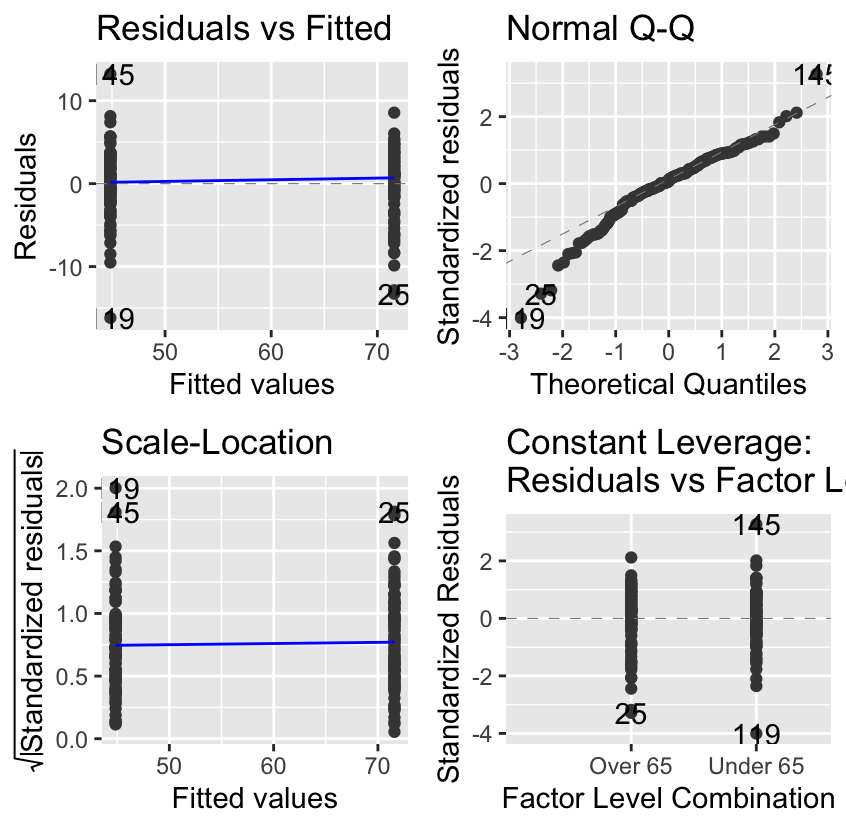

In [146]:
#Results of the first GLM image
display.Image("/Users/milliegallacher/Desktop/firstglm.png", width = "400")

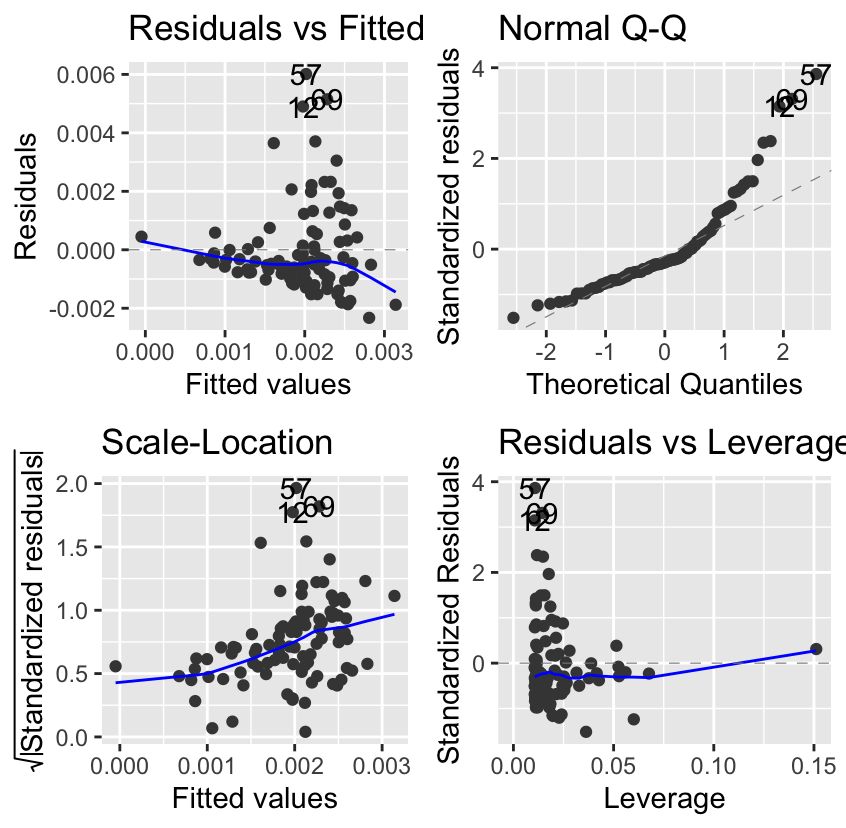

In [147]:
#Results of second GLM image
display.Image("/Users/milliegallacher/Desktop/secondglm.png", width = "400")